In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/ecommerce_btk/Reviews.csv"
df = pd.read_csv(file_path)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


# **VERİYİ TANIYALIM - EDA**

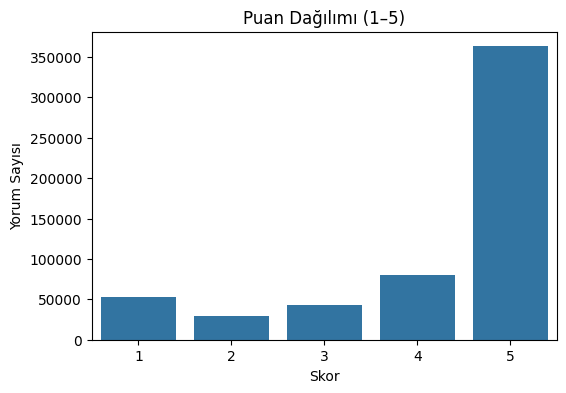

Ortalama Skor: 4.18


In [4]:
# Puanların dağılımı
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df)
plt.title('Puan Dağılımı (1–5)')
plt.xlabel('Skor')
plt.ylabel('Yorum Sayısı')
plt.show()

# Ortalama skor
print("Ortalama Skor:", round(df['Score'].mean(), 2))

yorumlarda uç noktalara eğilim var. 5 puan baskın. Positive / Neutral / Negative şeklinde etiketleme yapabiliriz

/tmp/ipython-input-3061801473.py:16: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


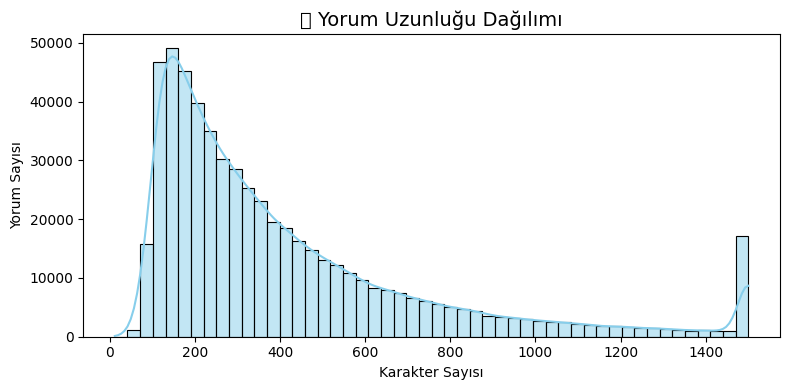

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yorum Uzunluğu Sütunu Ekle
df['review_length'] = df['Text'].astype(str).apply(len)

# 1500 karakterden uzunları analiz dışında bırak
df['review_length_clipped'] = df['review_length'].clip(upper=1500)

# Histogram Çizimi
plt.figure(figsize=(8,4))
sns.histplot(df['review_length_clipped'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('📝 Yorum Uzunluğu Dağılımı', fontsize=14)
plt.xlabel('Karakter Sayısı')
plt.ylabel('Yorum Sayısı')
plt.tight_layout()
plt.show()


yorumların çoğu kısa. Bu durum TF-IDF'de veri seyrekliği yaratabilir. 500+ karakterlik yorumlar detaylı içerik barındırabilir.
- çok kısa yorumlar <20 gibi spam/ boş içerik olabilir, çıkarabailiriz
- Uzun yorumları ayrı analiz et (premium insight)
- TF-IDF için max_features parametresiyle sınırlama getir

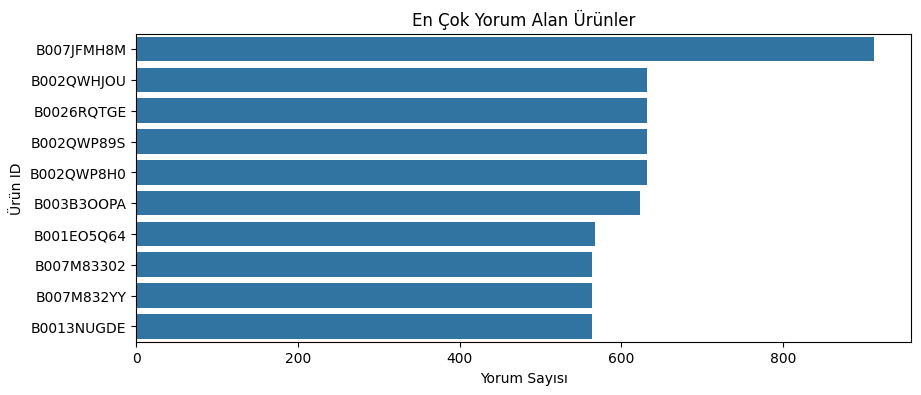

In [6]:
# en çok yorum alan ürünlere bakalım
top_products = df['ProductId'].value_counts().head(10)

plt.figure(figsize=(10,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('En Çok Yorum Alan Ürünler')
plt.xlabel('Yorum Sayısı')
plt.ylabel('Ürün ID')
plt.show()

 Bu ürünleri analiz için “örnek ürünler” olarak seçebiliriz. Ürün bazlı sentiment breakdown yap

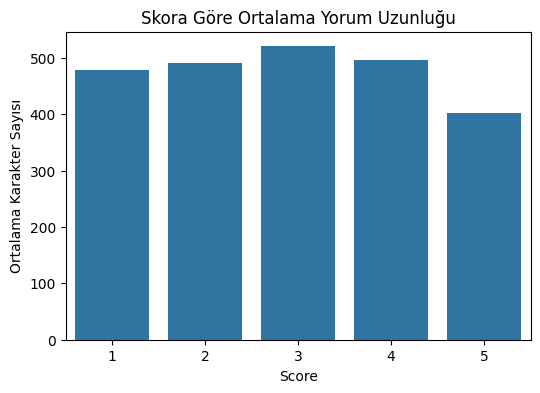

In [7]:
# skora göre ortalama yorum uzunluğu
score_len = df.groupby('Score')['review_length'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Score', y='review_length', data=score_len)
plt.title('Skora Göre Ortalama Yorum Uzunluğu')
plt.ylabel('Ortalama Karakter Sayısı')
plt.show()

 En detaylı yorumlar genellikle kararsız (3 puan) kullanıcılardan gelmekte.
 Gemini önerisi için uzun yorumlara öncelik verilerek daha iyi öneri alınabilir

Text(0.5, 1.0, 'Duygu Etiketlerinin Dağılımı')

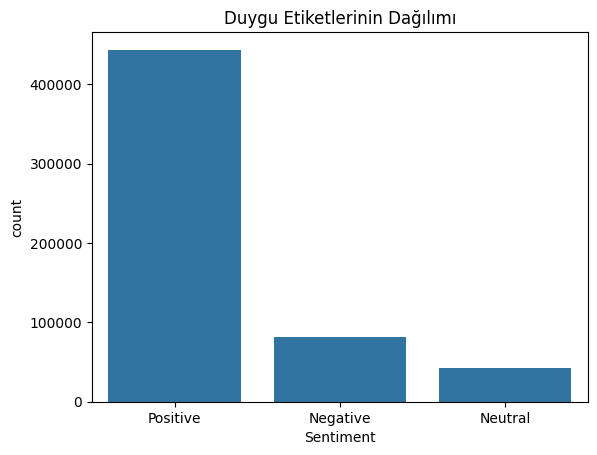

In [8]:
#Skorları pozitif–nötr–negatif olarak etiketleyelim
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(score_to_sentiment)

sns.countplot(x='Sentiment', data=df)
plt.title('Duygu Etiketlerinin Dağılımı')

veri pozitif ağırlıklı ve dengesiz

In [9]:
# Ürün Bazlı Ortalama Skor & Sentiment Oranı
product_sentiment_stats = df.groupby('ProductId').agg({
    'Score': 'mean',
    'Sentiment': lambda x: (x == 'Positive').sum() / len(x)
}).rename(columns={
    'Score': 'Ortalama_Skor',
    'Sentiment': 'Pozitif_Oran'
}).sort_values('Pozitif_Oran', ascending=False)

product_sentiment_stats.head()

,Ortalama_Skor,Pozitif_Oran
ProductId,,
B009WVB40S,5.0,1.0
B009PG8MVO,5.0,1.0
B009PFJUF2,5.0,1.0
B009PCDDO4,5.0,1.0
B009OY38SY,5.0,1.0


In [10]:
# Ürün Bazlı Ortalama Skor, Pozitif Oran ve Yorum Sayısı Hesaplama
product_stats = df.groupby('ProductId').agg(
    Ortalama_Skor=('Score', 'mean'),
    Yorum_Sayisi=('Sentiment', 'count'),
    Pozitif_Oran=('Sentiment', lambda x: (x == 'Positive').sum() / len(x))
).reset_index()

# Güven Endeksi Hesapla (Ağırlıklı ve Normalize Edilmiş)
# (Yorum sayısına göre ağırlıklandırarak daha dengeli hale getiriyoruz)
max_yorum_sayisi = product_stats['Yorum_Sayisi'].max()

product_stats['Güven_Endeksi'] = (
    (product_stats['Pozitif_Oran'] * 0.6) +
    ((product_stats['Ortalama_Skor'] / 5) * 0.4)
) * (product_stats['Yorum_Sayisi'] / max_yorum_sayisi)

# En düşük güvene sahip ürünler (Yorum sayısı 20’den fazla olanlardan filtreleyerek daha anlamlı hale getiriyoruz)
dusuk_guvenli_urunler = product_stats[product_stats['Yorum_Sayisi'] > 20] \
    .sort_values('Güven_Endeksi') \
    .head(10)

# Göster
dusuk_guvenli_urunler[['ProductId', 'Ortalama_Skor', 'Pozitif_Oran', 'Yorum_Sayisi', 'Güven_Endeksi']]


,ProductId,Ortalama_Skor,Pozitif_Oran,Yorum_Sayisi,Güven_Endeksi
11923,B000H26J7E,1.521739,0.086957,23,0.004381
7903,B000E1HW0G,1.571429,0.142857,21,0.004863
39944,B002EAN3T4,1.520000,0.120000,25,0.005301
17235,B000NY8OLK,1.315789,0.052632,38,0.005696
44875,B00346J8BO,1.592593,0.111111,27,0.005739
62854,B0052M5V0A,1.880000,0.160000,25,0.006747
3409,B0002DH5MG,1.372093,0.069767,43,0.007141
8738,B000EMRHT6,2.347826,0.217391,23,0.008018
25519,B0018CK2Y8,2.285714,0.285714,21,0.008149
12188,B000HCMRF2,2.285714,0.285714,21,0.008149


/tmp/ipython-input-3204289083.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_score = product_df.resample('M', on='Time')['Score'].mean()


<Axes: title={'center': 'B007JFMH8M Skor Zaman Serisi'}, xlabel='Time'>

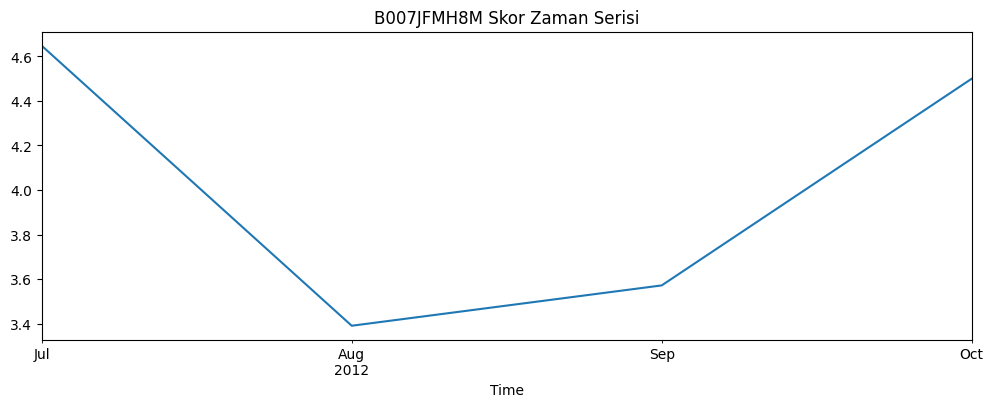

In [11]:
# Zamana Göre Skor Değişimi
df['Time'] = pd.to_datetime(df['Time'], unit='s')
product_id = 'B007JFMH8M'  # En çok yorum alan ürün

product_df = df[df['ProductId'] == product_id]
monthly_score = product_df.resample('M', on='Time')['Score'].mean()

monthly_score.plot(figsize=(12,4), title=f"{product_id} Skor Zaman Serisi")

Bu ürün daha önce “en çok yorum alan ürünler” listesinde yer alıyordu. ağustosta düşüş olmuş bi sorun yaşanmış olabilir

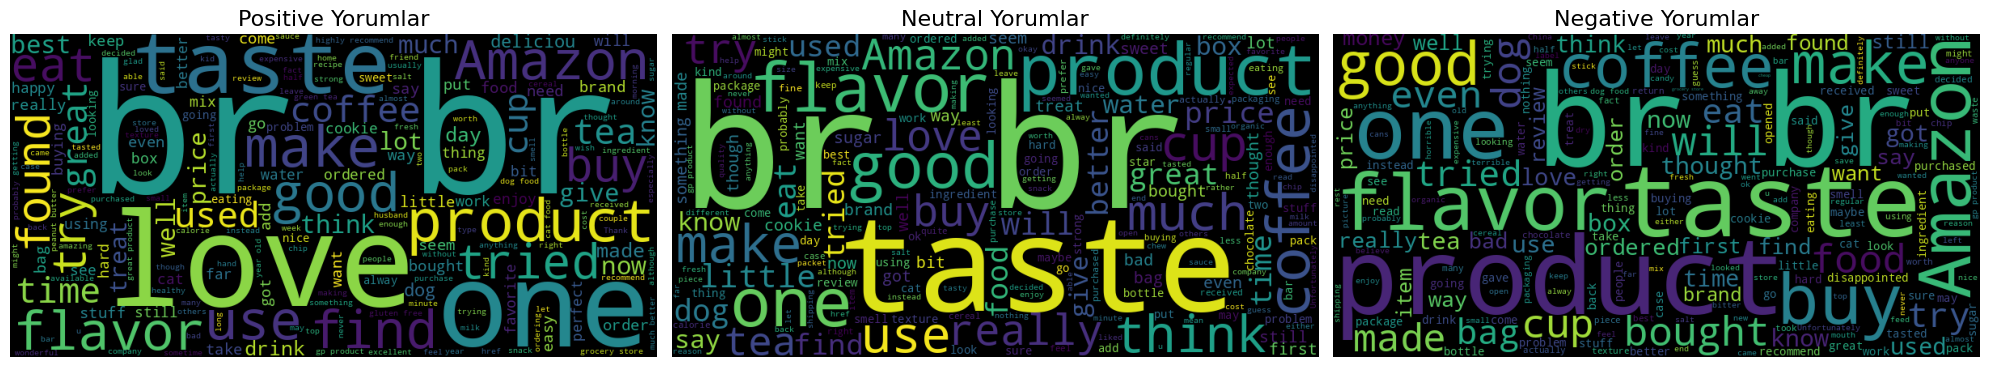

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Kelimelerin Sentiment’e Göre Dağılımı (WordCloud)
# Metinleri birleştir
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Text'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Text'])
neutral_text  = " ".join(df[df['Sentiment'] == 'Neutral']['Text'])

# Görselleştir
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].imshow(WordCloud(width=800, height=400).generate(positive_text))
axes[0].set_title("Positive Yorumlar", fontsize=16)
axes[0].axis("off")

axes[1].imshow(WordCloud(width=800, height=400).generate(neutral_text))
axes[1].set_title("Neutral Yorumlar", fontsize=16)
axes[1].axis("off")

axes[2].imshow(WordCloud(width=800, height=400).generate(negative_text))
axes[2].set_title("Negative Yorumlar", fontsize=16)
axes[2].axis("off")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Duyguya Göre Yardımcı Olma Oranı')

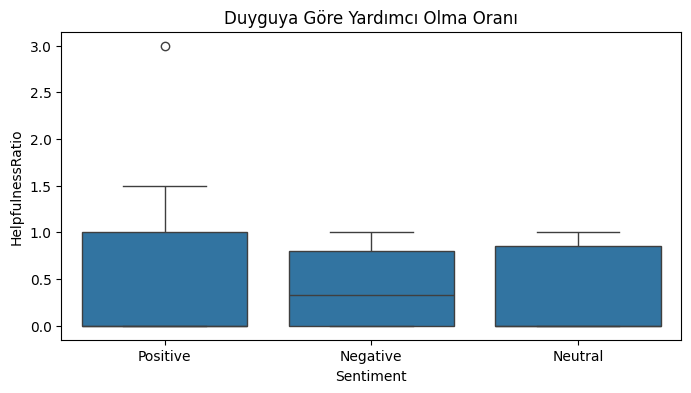

In [13]:
# Yardımcı Olma Skoru (Helpfulness) Analizi
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)

plt.figure(figsize=(8,4))
sns.boxplot(x='Sentiment', y='HelpfulnessRatio', data=df)
plt.title("Duyguya Göre Yardımcı Olma Oranı")

Positive yorumlar en çok faydalı bulunanlar arasında. Gemini ile “Bu yorum %X kişi tarafından faydalı bulunmuş” gibi metinler üretilebilir

In [14]:
# Ürün–Sentiment Pivot Tablosu
pivot = df.pivot_table(index='ProductId', columns='Sentiment', values='Id', aggfunc='count', fill_value=0)
pivot['Toplam'] = pivot.sum(axis=1)
pivot['Pozitif_Oran'] = pivot['Positive'] / pivot['Toplam']
pivot.sort_values('Pozitif_Oran', ascending=False).head(10)

Sentiment,Negative,Neutral,Positive,Toplam,Pozitif_Oran
ProductId,,,,,
B009WVB40S,0,0,1,1,1.0
B009PG8MVO,0,0,1,1,1.0
B009PFJUF2,0,0,2,2,1.0
B009PCDDO4,0,0,1,1,1.0
B009OY38SY,0,0,1,1,1.0
B009OM66IU,0,0,2,2,1.0
B009OM65H2,0,0,2,2,1.0
B009OM65GI,0,0,2,2,1.0
B009O7DGEW,0,0,1,1,1.0


Pozitif oranı %100 olan ürünler çıktı. Ama bu ürünlerde toplam yorum sayısı çok düşük.

Bu demek oluyor ki: Aşırı Pozitiflik = Gerçek Olmayabilir



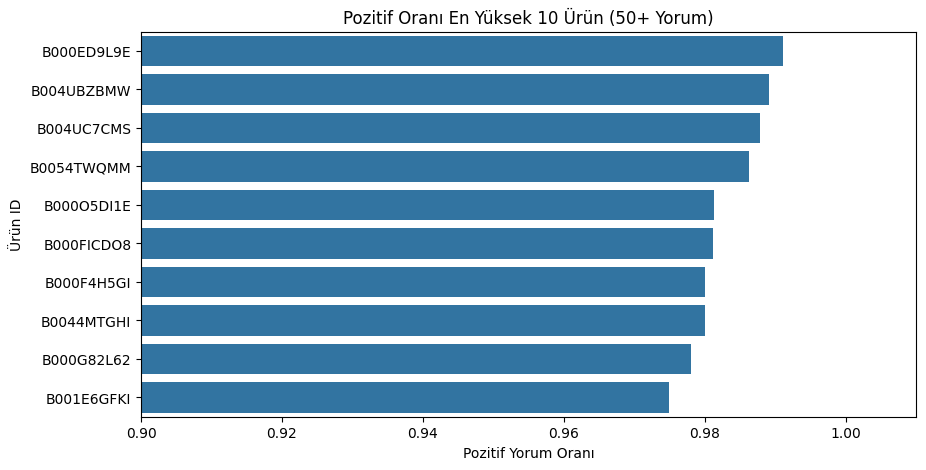

In [15]:
# 50+ yorumu olan ürünler arasından pozitif oranı en yüksek 10 ürün
pivot_filtered = pivot[pivot['Toplam'] >= 50]
pivot_filtered = pivot_filtered.sort_values('Pozitif_Oran', ascending=False).head(10)

pivot_filtered[['Positive', 'Negative', 'Neutral', 'Toplam', 'Pozitif_Oran']]

# görselleştirelim
plt.figure(figsize=(10,5))
sns.barplot(y=pivot_filtered.index, x=pivot_filtered['Pozitif_Oran'])
plt.title("Pozitif Oranı En Yüksek 10 Ürün (50+ Yorum)")
plt.xlabel("Pozitif Yorum Oranı")
plt.ylabel("Ürün ID")
plt.xlim(0.9, 1.01)
plt.show()

Bu tablo, hem yüksek sayıda yorum almış hem de yorumlarının çok büyük çoğunluğu pozitif olan ürünleri gösteriyor.

In [16]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [17]:
# Yorum metni ve skor gibi sütunlarda eksik veri var mı?
print("Boş yorum sayısı:", df['Text'].isnull().sum())
print("Boş skor sayısı:", df['Score'].isnull().sum())

Boş yorum sayısı: 0
Boş skor sayısı: 0


In [18]:
df = pd.read_csv(file_path)
df.drop(columns=['ProfileName', 'Summary'], inplace=True)
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,1303862400,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,1346976000,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,1219017600,This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,1307923200,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,1350777600,Great taffy at a great price. There was a wid...


In [19]:
# METİN TEMİZLEME
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# stopwords indir
nltk.download('stopwords')

# İngilizce stopwords listesi
stop_words = set(stopwords.words('english'))

# İngilizce kökleyici
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def clean_text(text):
    if pd.isnull(text):
        return ""

    # Küçük harfe çevir
    text = text.lower()

    # Link, e-posta, kullanıcı adı gibi yapıları temizle
    text = re.sub(r"http\S+|www\S+|@\S+", "", text)

    # Özel karakter ve sayıları kaldır (yalnızca harf ve boşluk)
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize et
    tokens = text.split()

    # Stopwords ve kökleyici uygulama
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]

    # Tekrar metne çevir
    return " ".join(tokens)

In [21]:
# "Text" sütununu temizleyip yeni bir sütuna yaz
df['Clean_Text'] = df['Text'].astype(str).apply(clean_text)

# Kontrol: İlk 5 temizlenmiş yoruma bakalım
df[['Text', 'Clean_Text']].sample(5)

,Text,Clean_Text
372175,"So far I have tried regular, BBQ, Ranch and Ch...",far tri regular bbq ranch chili lime sunflow s...
96341,This was too strong for me. Prefer the K-Cups....,strong prefer kcup like strong coffe wont purc...
157910,I grew up eating this candy when I was a kid i...,grew eat candi kid day cant get enough happi f...
121650,"One of my kitties has ear allergies, so after ...",one kitti ear allergi much research decid put ...
219888,"Like any powdered meal replacement, it suffers...",like powder meal replac suffer somewhat chalki...


## **TF - IDF**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer ayarları:
tfidf = TfidfVectorizer(
    max_features=10000,          # 10K özellik
    ngram_range=(1, 2),          # Unigram ve bigram kullan (tekli ve ikili kelime kalıpları)
    min_df=5,                    # En az 5 belgede geçen kelimeler (gürültü engeli)
    max_df=0.85,                 # Çok sık geçen kelimeleri çıkar
    stop_words='english',        # Ekstra stopword temizliği
    sublinear_tf=True            # tf'yi logaritmik olarak küçült (daha dengeli)
)

# Tüm satırlar string olmalı
df['Clean_Text'] = df['Clean_Text'].astype(str)

# TF-IDF vektörizasyonu
X_tfidf = tfidf.fit_transform(df['Clean_Text'])

# Boyut bilgisi
print(f"TF-IDF matrisi boyutu: {X_tfidf.shape}")

# Matris yoğunluğu (ne kadar boşluk var?)
density = X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])
print(f"TF-IDF matrisi yoğunluk oranı: {density:.6f}")

import joblib

joblib.dump(tfidf, "tfidf_vectorizer.pkl")

TF-IDF matrisi boyutu: (568454, 10000)
TF-IDF matrisi yoğunluk oranı: 0.003440


['tfidf_vectorizer.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(score_to_sentiment)

# Örnek: Sentiment hedef değişkeni
y = df['Sentiment']

# Veriyi böl
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Model eğit
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Değerlendirme
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.75      0.70      0.72     16181
     Neutral       0.56      0.23      0.33      8485
    Positive       0.91      0.97      0.94     89025

    accuracy                           0.88    113691
   macro avg       0.74      0.63      0.66    113691
weighted avg       0.86      0.88      0.86    113691



## **FEATURE ENGİNEERİNG**

In [ ]:
# Yorumları stringe çevirerek başlayalım
df['Text'] = df['Text'].astype(str)

# Kelime sayısı
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

# Karakter sayısı
df['char_count'] = df['Text'].apply(len)

# Cümle sayısı (nokta sayısı)
df['sentence_count'] = df['Text'].apply(lambda x: x.count('.'))

# Ortalama kelime uzunluğu (sıfıra bölme kontrolü ile)
df['avg_word_length'] = df.apply(
    lambda row: row['char_count'] / row['word_count'] if row['word_count'] > 0 else 0,
    axis=1
)

# Ünlem sayısı (duygusal yoğunluk)
df['exclamation_count'] = df['Text'].apply(lambda x: x.count('!'))

# Büyük harf sayısı (vurgu)
df['capital_count'] = df['Text'].apply(lambda x: sum(1 for c in x if c.isupper()))

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab') # Download the missing resource


lemmatizer = WordNetLemmatizer()
# Yorumlara özel kelime listeleri
positive_words = set([
    'great', 'good', 'excellent', 'amazing', 'awesome', 'perfect', 'wonderful', 'fantastic', 'satisfied',
    'love', 'like', 'recommend', 'favorite', 'best', 'pleased', 'impress', 'tasty',
    'delicious', 'yummy', 'flavorful', 'fresh', 'sweet', 'savory',
    'affordable', 'reasonable', 'cheap', 'worth', 'valuable', 'bargain', 'deal',
    'fast', 'quick', 'ontime', 'reliable', 'safe', 'secure', 'wellpackaged'
])

negative_words = set([
    'bad', 'terrible', 'horrible', 'worst', 'poor', 'disappoint', 'unsatisfied', 'unhappy', 'regret',
    'tasteless', 'stale', 'spoil', 'sour', 'bland', 'gross', 'weird', 'burnt', 'dry',
    'late', 'slow', 'broken', 'damaged', 'missing', 'leak', 'moldy', 'expired',
    'expensive', 'overpriced', 'waste', 'scam', 'ripoff', 'cheaply'
])

neutral_words = set([
    'product', 'item', 'packaging', 'brand', 'container', 'package', 'size', 'quantity',
    'receive', 'deliver', 'purchase', 'order', 'ship', 'price', 'amount', 'weight',
    'use', 'store', 'market', 'try', 'available', 'buy'
])

# Noktalama temizleme ve lemmatize etme
def clean_lemmatize(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return [lemmatizer.lemmatize(word) for word in tokens]

# Tokenları oluştur
df['tokens'] = df['Text'].apply(clean_lemmatize)

# Pozitif, negatif, nötr kelime sayıları
df['positive_word_count'] = df['tokens'].apply(lambda tokens: sum(word in positive_words for word in tokens))
df['negative_word_count'] = df['tokens'].apply(lambda tokens: sum(word in negative_words for word in tokens))
df['neutral_word_count']  = df['tokens'].apply(lambda tokens: sum(word in neutral_words  for word in tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['review_year'] = df['Time'].dt.year
df['review_month'] = df['Time'].dt.month
df['review_dayofweek'] = df['Time'].dt.dayofweek

print(df['Time'].head())
print(df['review_year'].value_counts().sort_index())

0   2011-04-27
1   2012-09-07
2   2008-08-18
3   2011-06-13
4   2012-10-21
Name: Time, dtype: datetime64[ns]
review_year
1999         6
2000        32
2001        13
2002        73
2003       132
2004       561
2005      1335
2006      6671
2007     22300
2008     34163
2009     55326
2010     85884
2011    163299
2012    198659
Name: count, dtype: int64


In [ ]:
# HelpfulnessRatio sınıflandırma
df['HelpfulnessRatio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
df['is_helpful'] = df['HelpfulnessRatio'].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
print(df.columns)

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text', 'Clean_Text',
       'Sentiment', 'word_count', 'char_count', 'sentence_count',
       'avg_word_length', 'exclamation_count', 'capital_count', 'tokens',
       'positive_word_count', 'negative_word_count', 'neutral_word_count',
       'review_year', 'review_month', 'review_dayofweek', 'HelpfulnessRatio',
       'is_helpful'],
      dtype='object')


In [ ]:
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,Clean_Text,Sentiment,...,capital_count,tokens,positive_word_count,negative_word_count,neutral_word_count,review_year,review_month,review_dayofweek,HelpfulnessRatio,is_helpful
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,2011-04-27,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...,Positive,...,5,"[i, have, bought, several, of, the, vitality, ...",2,0,3,2011,4,2,1.0,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,2012-09-07,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...,Negative,...,6,"[product, arrived, labeled, a, jumbo, salted, ...",0,0,2,2012,9,4,0.0,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,2008-08-18,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...,Positive,...,21,"[this, is, a, confection, that, ha, been, arou...",3,0,0,2008,8,0,1.0,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,2011-06-13,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...,Negative,...,10,"[if, you, are, looking, for, the, secret, ingr...",1,0,0,2011,6,0,1.0,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,2012-10-21,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...,Positive,...,4,"[great, taffy, at, a, great, price, there, wa,...",5,0,1,2012,10,6,0.0,0


In [ ]:
#Her ürünün ortalama puanı
avg_product_rating = df.groupby('ProductId')['Score'].mean().rename('avg_product_rating')
df = df.merge(avg_product_rating, on='ProductId', how='left')

#Standart Sapma
product_rating_std = df.groupby('ProductId')['Score'].std().rename('rating_std')
df = df.merge(product_rating_std, on='ProductId', how='left')

In [ ]:
#kullanıcının toplam yorum sayısı
user_review_count = df.groupby('UserId')['Id'].count().rename('user_review_count')
df = df.merge(user_review_count, on='UserId', how='left')

In [ ]:
# Ürünün ilk yorumundan bu yoruma kadar geçen süre
df['Time'] = pd.to_datetime(df['Time'])
first_review_time = df.groupby('ProductId')['Time'].min().rename('first_review')
df = df.merge(first_review_time, on='ProductId', how='left')
df['review_time_delta'] = (df['Time'] - df['first_review']).dt.days
df.drop('first_review', axis=1, inplace=True)

In [ ]:
# Spam/troll tespiti
import re
# Install the emoji library if not already installed
!pip install emoji
import emoji

# emoji tespiti
def contains_emoji(text):
    return int(any(char in emoji.EMOJI_DATA for char in text))

# kapsamlı URL tespiti (http, www, .com, .net, .org vb.)
url_pattern = re.compile(
    r'(http[s]?://\S+|www\.\S+|\S+\.(com|net|org|io|co|info|biz|me)(/\S*)?)',
    re.IGNORECASE
)

def contains_url(text):
    return int(bool(url_pattern.search(text)))

df['has_emoji'] = df['Text'].apply(contains_emoji)
df['contains_url'] = df['Text'].apply(contains_url)
# tekrar eden kullanıcıları da tespit etmek için
df['duplicate_review_count'] = df.groupby(['UserId', 'Text'])['Text'].transform('count')
df['is_duplicate_review'] = df['duplicate_review_count'] > 1

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['sentiment_compound'] = df['Text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import re

# Belirli yönleri tanımla
aspects = ['taste', 'price', 'packaging', 'shipping', 'quality', 'delivery', 'size', 'smell']

# Belirtilen yönlerin yorumda geçip geçmediğini kontrol eden fonksiyon
def detect_aspect_mentions(text, aspects):
    results = {}
    for aspect in aspects:
        # \b kullanarak kelime sınırlarına dikkat ederiz (örneğin: 'tasteful' yerine sadece 'taste')
        pattern = r'\b' + re.escape(aspect) + r'\b'
        results[f'{aspect}_mention'] = int(bool(re.search(pattern, text, flags=re.IGNORECASE)))
    return results

# Fonksiyonu tüm veri kümesine uygula
aspect_df = df['Text'].apply(lambda x: pd.Series(detect_aspect_mentions(str(x), aspects)))

# Yeni sütunları ana dataframe'e ekle
df = pd.concat([df, aspect_df], axis=1)

In [ ]:
df = df.sort_index(axis=1)

INSIGHT

In [ ]:
high_engagement_positive = pivot[(pivot['Toplam'] > 100) & (pivot['Pozitif_Oran'] > 0.98)]

In [ ]:
df[df['taste_mention'] == 1]['Sentiment'].value_counts(normalize=True)

,proportion
Sentiment,
Positive,0.723687
Negative,0.173738
Neutral,0.102575


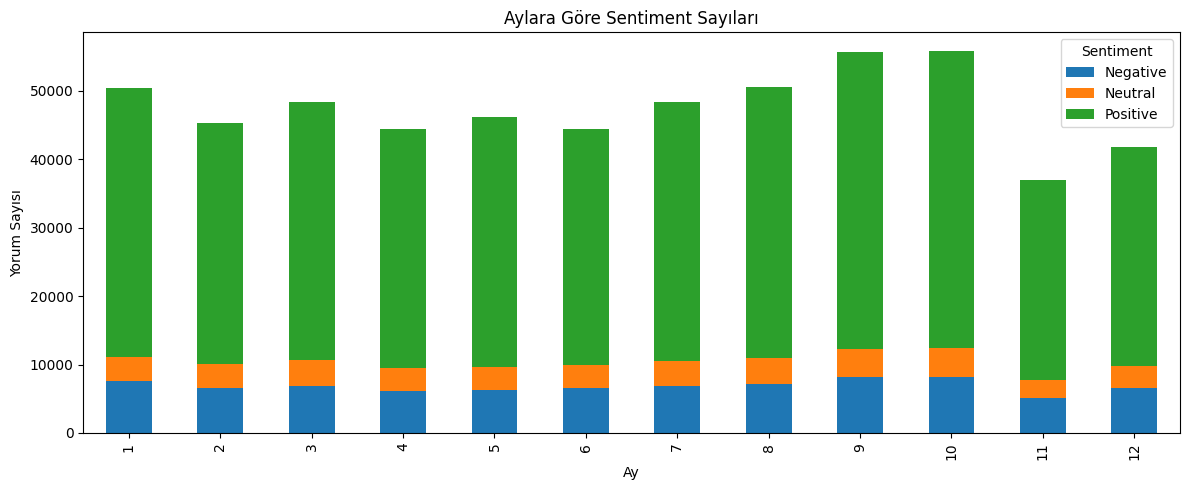

In [ ]:
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment'] = df['Score'].apply(score_to_sentiment)

raw_sentiment = df.groupby('review_month')['Sentiment'].value_counts().unstack()
raw_sentiment.plot(kind='bar', stacked=True, figsize=(12,5))
plt.title("Aylara Göre Sentiment Sayıları")
plt.ylabel("Yorum Sayısı")
plt.xlabel("Ay")
plt.tight_layout()
plt.show()

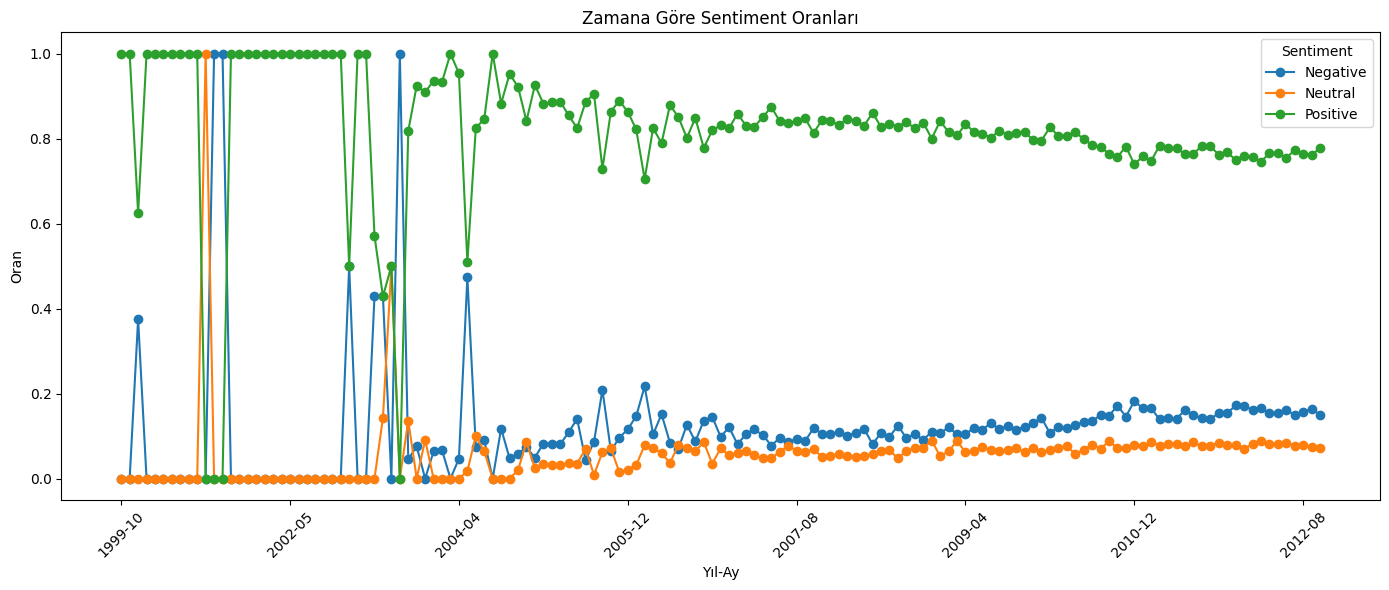

In [ ]:
monthly_trend = df.groupby(['review_year', 'review_month'])['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
monthly_trend.index = [f"{y}-{m:02}" for y, m in monthly_trend.index]

monthly_trend.plot(figsize=(14,6), marker='o')
plt.title("Zamana Göre Sentiment Oranları")
plt.xlabel("Yıl-Ay")
plt.ylabel("Oran")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns.tolist())

['Clean_Text', 'HelpfulnessDenominator', 'HelpfulnessNumerator', 'HelpfulnessRatio', 'Id', 'ProductId', 'Score', 'Sentiment', 'Text', 'Time', 'UserId', 'avg_product_rating', 'avg_word_length', 'capital_count', 'char_count', 'contains_url', 'delivery_mention', 'duplicate_review_count', 'exclamation_count', 'has_emoji', 'is_duplicate_review', 'is_helpful', 'negative_word_count', 'neutral_word_count', 'packaging_mention', 'positive_word_count', 'price_mention', 'quality_mention', 'rating_std', 'review_dayofweek', 'review_month', 'review_time_delta', 'review_year', 'sentence_count', 'sentiment_compound', 'shipping_mention', 'size_mention', 'smell_mention', 'taste_mention', 'tokens', 'user_review_count', 'word_count']


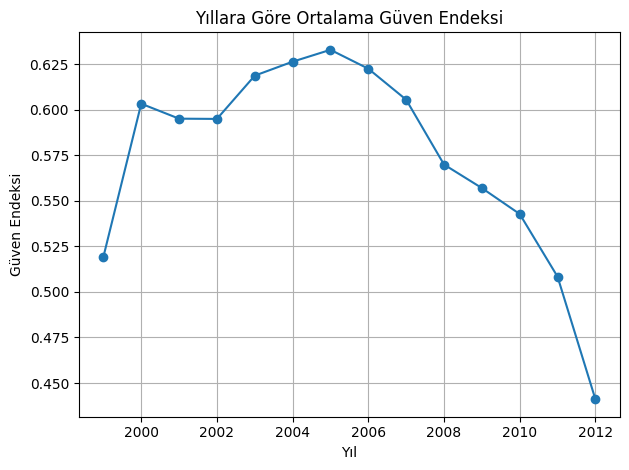

In [ ]:
# Ağırlıklı Güven Endeksi Hesabı
df['Güven_Endeksi'] = (
    (df['HelpfulnessRatio'].fillna(0) * 0.4) +
    ((df['avg_product_rating'] / 5).fillna(0) * 0.3) +
    ((df['positive_word_count'] / (df['word_count'] + 1)).fillna(0) * 0.2) +
    ((df['sentiment_compound'] + 1) / 2 * 0.1)  # compound -1 ile 1 arasında
)

import matplotlib.pyplot as plt

df.groupby('review_year')['Güven_Endeksi'].mean().plot(marker='o')
plt.title("Yıllara Göre Ortalama Güven Endeksi")
plt.ylabel("Güven Endeksi")
plt.xlabel("Yıl")
plt.grid(True)
plt.tight_layout()
plt.show()

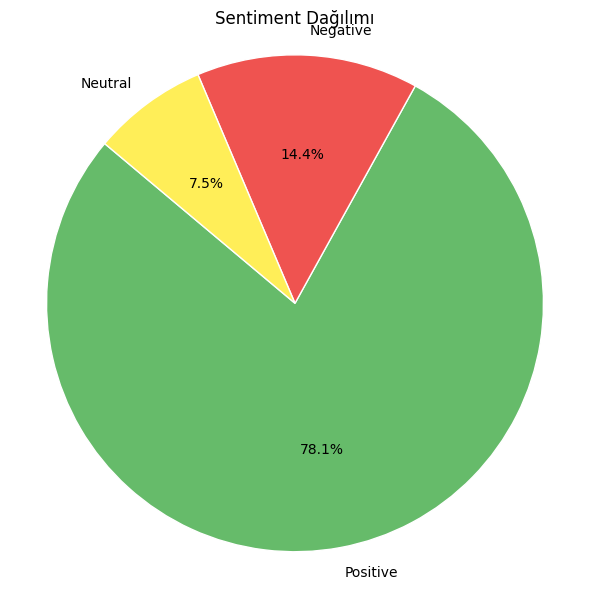

In [ ]:
import matplotlib.pyplot as plt

# Sentiment oranlarını al
sentiment_proportion = df['Sentiment'].value_counts(normalize=True)

# Renkler ve etiketler
colors = ['#66bb6a', '#ef5350', '#ffee58']  # Positive, Negative, Neutral
labels = sentiment_proportion.index
sizes = sentiment_proportion.values

# Pasta grafiği oluştur
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'white'})
plt.title('Sentiment Dağılımı')
plt.axis('equal')
plt.tight_layout()
plt.show()

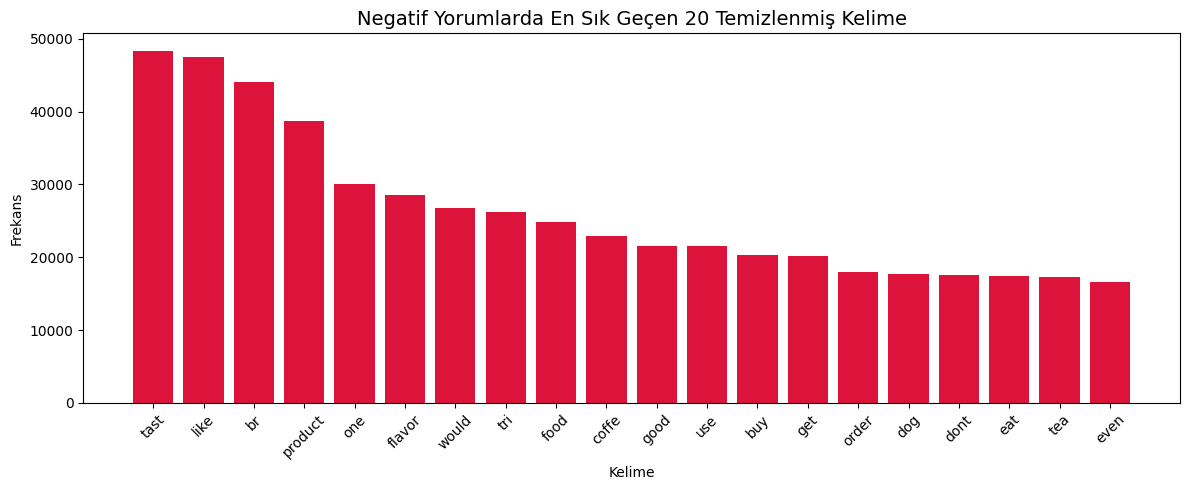

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Sadece NEGATİF yorumları al ve Clean_Text sütununu kullan
negative_words = " ".join(df[df['Sentiment'] == 'Negative']['Clean_Text']).split()

# Kelime frekanslarını hesapla
negative_word_freq = Counter(negative_words)

# En sık geçen 20 kelimeyi al
most_common_negative = negative_word_freq.most_common(20)

# Ayrıştır: kelimeler ve frekanslar
words, freqs = zip(*most_common_negative)

# Görselleştir
plt.figure(figsize=(12, 5))
plt.bar(words, freqs, color='crimson')
plt.title("Negatif Yorumlarda En Sık Geçen 20 Temizlenmiş Kelime", fontsize=14)
plt.ylabel("Frekans")
plt.xlabel("Kelime")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Clean_Text', 'HelpfulnessDenominator', 'HelpfulnessNumerator',
       'HelpfulnessRatio', 'Id', 'ProductId', 'Score', 'Sentiment', 'Text',
       'Time', 'UserId', 'avg_product_rating', 'avg_word_length',
       'capital_count', 'char_count', 'contains_url', 'delivery_mention',
       'duplicate_review_count', 'exclamation_count', 'has_emoji',
       'is_duplicate_review', 'is_helpful', 'negative_word_count',
       'neutral_word_count', 'packaging_mention', 'positive_word_count',
       'price_mention', 'quality_mention', 'rating_std', 'review_dayofweek',
       'review_month', 'review_time_delta', 'review_year', 'sentence_count',
       'sentiment_compound', 'shipping_mention', 'size_mention',
       'smell_mention', 'taste_mention', 'tokens', 'user_review_count',
       'word_count', 'Güven_Endeksi'],
      dtype='object')

# **MODELLEME**

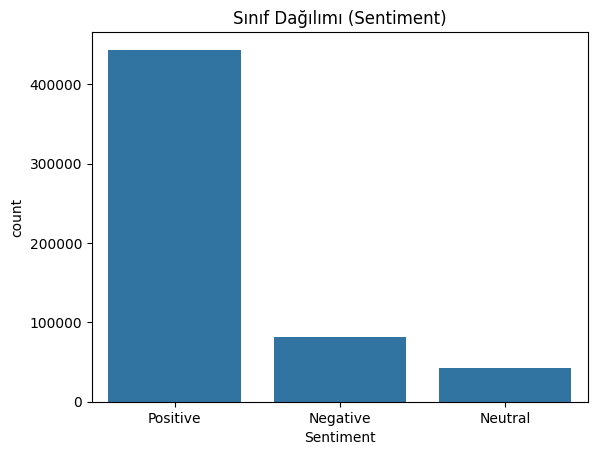

Sınıf oranları:
 Sentiment
Positive    0.780674
Negative    0.144316
Neutral     0.075010
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Sınıf Dağılımı (Sentiment)")
plt.show()

print("Sınıf oranları:\n", y.value_counts(normalize=True))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from scipy.sparse import hstack, csr_matrix

# Numeric Özellikleri Tanımlayalım
numeric_cols = [
    'word_count', 'char_count', 'sentence_count', 'avg_word_length',
    'exclamation_count', 'capital_count', 'positive_word_count',
    'negative_word_count', 'neutral_word_count', 'review_time_delta',
    'has_emoji', 'contains_url', 'sentiment_compound',
    'taste_mention', 'price_mention', 'packaging_mention',
    'shipping_mention', 'quality_mention', 'delivery_mention',
    'size_mention', 'smell_mention'
]

# Numeric veri çerçevesi
X_numeric = df[numeric_cols].fillna(0).astype(float)

# TF-IDF + Sayısal Özellikleri Birleştir
X_combined = hstack([X_tfidf, csr_matrix(X_numeric)])

# Hedef Değişken: Sentiment
y = df['Sentiment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Pozitif=2, Negatif=0, Neutral=1 olabilir

# Eğitim/Test Böl
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# SMOTE Uygula
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# LightGBM Modeli
model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    learning_rate=0.1,
    class_weight='balanced',
    random_state=42
)

# Eğit ve Tahmin Et
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Sınıflandırma Raporu
print(classification_report(y_test, y_pred, target_names=le.classes_))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 338.213109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277615
[LightGBM] [Info] Number of data points in the train set: 1065063, number of used features: 10021
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71     16407
     Neutral       0.45      0.43      0.44      8528
    Positive       0.93      0.93      0.93     88756

    accuracy                           0.86    113691
   macro avg       0.70      0.69      0.69    113691
weighted avg       0.86      0.86      0.86    113691



In [ ]:
import joblib

# Modeli drive'a kaydet
model_path = "/content/drive/MyDrive/ecommerce_btk/lightgbm_model.pkl"
joblib.dump(model, model_path)

print(f"Model başarıyla kaydedildi: {model_path}")

Model başarıyla kaydedildi: /content/drive/MyDrive/ecommerce_btk/lightgbm_model.pkl


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import joblib

# Numeric Özellikleri Tanımlayalım
numeric_cols = [
    'word_count', 'char_count', 'sentence_count', 'avg_word_length',
    'exclamation_count', 'capital_count', 'positive_word_count',
    'negative_word_count', 'neutral_word_count', 'review_time_delta',
    'has_emoji', 'contains_url', 'sentiment_compound',
    'taste_mention', 'price_mention', 'packaging_mention',
    'shipping_mention', 'quality_mention', 'delivery_mention',
    'size_mention', 'smell_mention'
]

# Numeric veri çerçevesi
X_numeric = df[numeric_cols].fillna(0).astype(float)

# TF-IDF + Sayısal Özellikleri Birleştir
X_combined = hstack([X_tfidf, csr_matrix(X_numeric)])

# Hedef Değişken: Sentiment
y = df['Sentiment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim/Test Böl
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# SMOTE Uygula (minority class weight ayarlamak için kullanılır)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# LightGBM Modeli
model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    learning_rate=0.1,
    class_weight={
        0: 1,   # Negative
        1: 2,   # Neutral
        2: 1    # Positive
    },
    random_state=42
)

# Eğit ve Tahmin Et
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

# Sınıflandırma Raporu
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Modeli Drive'a Kaydet
model_path = "/content/drive/MyDrive/ecommerce_btk/lightgbm_model_v2.pkl"
joblib.dump(model, model_path)
print(f"Model başarıyla kaydedildi: {model_path}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 369.983919 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277615
[LightGBM] [Info] Number of data points in the train set: 1065063, number of used features: 10021
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -1.386294


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

    Negative       0.74      0.63      0.68     16407
     Neutral       0.33      0.61      0.43      8528
    Positive       0.94      0.89      0.91     88756

    accuracy                           0.83    113691
   macro avg       0.67      0.71      0.67    113691
weighted avg       0.87      0.83      0.84    113691

Model başarıyla kaydedildi: /content/drive/MyDrive/ecommerce_btk/lightgbm_model_v2.pkl


In [ ]:
joblib.dump(tfidf, "/content/drive/MyDrive/ecommerce_btk/tfidf_vectorizer.pkl")
joblib.dump(le, "/content/drive/MyDrive/ecommerce_btk/label_encoder.pkl")

['/content/drive/MyDrive/ecommerce_btk/cleaned_reviews.csv']

In [ ]:
# Tüm sütun isimlerini gör
print(df.columns)

# İlk 5 satırı gör
print(df.head())

# Veri tiplerini gör
print(df.dtypes)

# Eksik değerleri kontrol et
print(df.isnull().sum())

# Şekli gör (satır x sütun)
print(df.shape)

Index(['Clean_Text', 'HelpfulnessDenominator', 'HelpfulnessNumerator',
       'HelpfulnessRatio', 'Id', 'ProductId', 'Score', 'Sentiment', 'Text',
       'Time', 'UserId', 'avg_product_rating', 'avg_word_length',
       'capital_count', 'char_count', 'contains_url', 'delivery_mention',
       'duplicate_review_count', 'exclamation_count', 'has_emoji',
       'is_duplicate_review', 'is_helpful', 'negative_word_count',
       'neutral_word_count', 'packaging_mention', 'positive_word_count',
       'price_mention', 'quality_mention', 'rating_std', 'review_dayofweek',
       'review_month', 'review_time_delta', 'review_year', 'sentence_count',
       'sentiment_compound', 'shipping_mention', 'size_mention',
       'smell_mention', 'taste_mention', 'tokens', 'user_review_count',
       'word_count', 'Güven_Endeksi'],
      dtype='object')
                                          Clean_Text  HelpfulnessDenominator  \
0  bought sever vital can dog food product found ...                      

In [ ]:
df.to_csv("final_cleaned_data.csv", index=False)

df = pd.read_csv("final_cleaned_data.csv")

print(df.head())

                                          Clean_Text  HelpfulnessDenominator  \
0  bought sever vital can dog food product found ...                       1   
1  product arriv label jumbo salt peanutsth peanu...                       0   
2  confect around centuri light pillowi citru gel...                       1   
3  look secret ingredi robitussin believ found go...                       3   
4  great taffi great price wide assort yummi taff...                       0   

   HelpfulnessNumerator  HelpfulnessRatio  Id   ProductId  Score Sentiment  \
0                     1               1.0   1  B001E4KFG0      5  Positive   
1                     0               0.0   2  B00813GRG4      1  Negative   
2                     1               1.0   3  B000LQOCH0      4  Positive   
3                     3               1.0   4  B000UA0QIQ      2  Negative   
4                     0               0.0   5  B006K2ZZ7K      5  Positive   

                                                Te

In [ ]:
df.to_csv("/content/drive/MyDrive/ecommerce_btk/final_cleaned_dataset.csv", index=False)